# **CLUSTERING 1**
---
Clustering atau klasterisasi adalah metode pengelompokan data. Clustering merupakan proses partisi satu set objek data ke dalam himpunan bagian yang disebut dengan cluster. Objek yang di dalam cluster memiliki kemiripan karakteristik antar satu sama lainnya dan berbeda dengan cluster yang lain. Partisi tidak dilakukan secara manual melainkan dengan suatu algoritma clustering. Oleh karena itu, clustering sangat berguna dan bisa menemukan group atau kelompokyang tidak dikenal dalam data. 

---
Task yang dilakukan adalah mengelompokkan data penjualan rumah berdasarkan lokasi menggunakan atribut longitude dan latitude. K-Mean dipilih sebagai metode dalam task ini. Tujuan dari clustering adalah meminimumkan jarak antara data point dan centroid, serta memaksimumkan jarak antara centroid yang dihitung menggunakan within-cluster sum of squares atau WCSS.

---

## **Import Library**

In [ ]:
#Pandas (Python for Data Analysis) adalah library Python yang fokus untuk proses analisis data seperti manipulasi data, persiapan data, dan pembersihan data. 
#Pandas menyediakan struktur data dan fungsi high-level untuk membuat pekerjaan dengan data terstruktur/tabular lebih cepat, mudah, dan ekspresif.
import pandas as pd
#NumPy (Numerical Python) adalah library Python yang fokus pada scientific computing. 
#NumPy memiliki kemampuan untuk membentuk objek N-dimensional array, yang mirip dengan list pada Python.
import numpy as np
#library random berguna untuk melakukan random pada angka tertentu
import random as rd
#library matplotlib berguna untuk melakukan plot gambar
import matplotlib.pyplot as plt

## **Load Data**
Load Data adalah proses upload dan pembacaan data yang telah diupload.

In [ ]:
#import library upload file pada google colab
from google.colab import files
#mengupload file
dataupload = files.upload()

Saving air_bnb.csv to air_bnb.csv


In [ ]:
#import io untuk membaca dataset yang telah diupload
import io
#membaca data csv yang telah diupload dengan nama air_bnb
import pandas as pd
df = pd.read_csv(io.BytesIO(dataupload['air_bnb.csv']))
#menampilkan data yang telah dibaca
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              22552 non-null  int64  
 1   name                            22493 non-null  object 
 2   host_id                         22552 non-null  int64  
 3   host_name                       22526 non-null  object 
 4   neighbourhood_group             22552 non-null  object 
 5   neighbourhood                   22552 non-null  object 
 6   latitude                        22552 non-null  float64
 7   longitude                       22552 non-null  float64
 8   room_type                       22552 non-null  object 
 9   price                           22552 non-null  int64  
 10  minimum_nights                  22552 non-null  int64  
 11  number_of_reviews               22552 non-null  int64  
 12  last_review                     

## **Preprocessing**

In [ ]:
#Pada tahap ini dilakukan pengambilan atribut yang akan digunakan pada clustering, yaitu latitude dan longitude.
data = (df[["latitude", "longitude"]])

In [ ]:
#mengidentifikasi variabel X sebagai split data, dimana artinya adalah memisahkan 2 kolom yaitu latitude dan longitude agar berbentuk matriks
X = data.iloc[:, [0, 1]].values

In [ ]:
#menampilkan matriks X 
X

array([[52.53453732, 13.40255693],
       [52.54851279, 13.40455283],
       [52.53499619, 13.41757867],
       ...,
       [52.53179977, 13.41199948],
       [52.52080183, 13.37868779],
       [52.47376159, 13.42444719]])

In [ ]:
#Pada fungsi shape ini menghasilkan sebuah tuple yang berisikan panjang sebuah array pada tiap dimensi
#array tersebut sesuai dengan jumlah row pada data
#m adalah tuple pada kolom pertama yaitu latitude
m = X.shape[0]
#n adalah tuple pada kolom kedua yaitu longitude
n = X.shape[1] 

## **Proses Clustering menggunakan K-Means**

### **Inisialisasi Cluster**

In [ ]:
#inisialisasi jumlah iterasi yaitu 100
n_iter = 100
#inisialisasi jumlah cluster yaitu 5
K = 5

### **Inisialisasi Centroid**

In [ ]:
#melakukan inisialisasi centroid 
Centroids = np.array([]).reshape(n,0)

In [ ]:
#melakukan perulangan untuk memperbaharui centroid sesuai dengan range K
for i in range(K):
    #melakukan random angka 0 dan m-1 sehingga pengelompokkan data yang dihasilkan dapat berbeda-beda
    rand = rd.randint(0, m-1)
    #memperbaharui Centroids sesuai dengan hasil angka random yang akan dimasukkan ke matriks X
    Centroids = np.c_[Centroids,X[rand]]

### **Menghitung Eucledian Distance**

In [ ]:
#melakukan inisialisasi EuclidianDistance dengan mengambil kolom m
EuclidianDistance = np.array([]).reshape(m,0)
#melakukan perulangan sebanyak K yaitu jumlah centroid = 5
for k in range(K):
    #melakukan inisialisasi dan perhitungan eucledia distance dengan rumus menjumlahkan pengurangan pada nilai kolom m dan kolom n sebanyak K (jumlah centroid)
    #Hitung jarak masing-masing titik terhadap centroid yg dipilih
    tempDist = np.sum((X-Centroids[:, k])**2, axis = 1)
    #melakukan inisialisasi variabel yang akan membuat array yang terdiri dari EuclideanDistance dan tempDist
    EuclidianDistance = np.c_[EuclidianDistance, tempDist]
#mengembalikan nilai C sebagai hasil dari EuclidianDistance 
C = np.argmin(EuclidianDistance, axis = 1) + 1

### **Melakukan Clustering**

In [ ]:
#melakukan inisialisasi Output
Output = {}

In [ ]:
#melakukan inisialisasi Y 
Y = {}
#melakukan perulangan sebanyak K yaitu jumlah centroid = 5
for k in range(K):
    Y[k+1] = np.array([]).reshape(2,0)
#melakukan perulangan sebanyak m kali. m mendeskripsikan kolom latitude
for i in range(m):
    Y[C[i]] = np.c_[Y[C[i]],X[i]]
#melakukan perulangan sebanyak K yaitu jumlah centroid = 5     
for k in range(K):
    Y[k+1] = Y[k+1].T
#melakukan perulangan sebanyak K yaitu jumlah centroid = 5
for k in range(K):
    Centroids[:,k] = np.mean(Y[k+1],axis = 0)

In [ ]:
#melakukan perulangan jumlah iterasi yaitu 100
for i in range(n_iter):
    #step 2.a
    #inisialisasi EuclidianDistance dengan membuat tupel kolom 0
    EuclidianDistance = np.array([]).reshape(m,0)
    #melakukan perulangan sebanyak K yaitu jumlah centroid = 5
    for k in range(K):
        #melakukan perulangan sebanyak K yaitu jumlah centroid = 5, untuk menyempurnakan posisi centroid
        tempDist = np.sum((X-Centroids[:,k])**2,axis = 1)
        #melakukan inisialisasi dan perhitungan eucledia distance dengan rumus menjumlahkan pengurangan pada nilai kolom m dan kolom n sebanyak K (jumlah centroid)
        #Hitung jarak masing-masing titik terhadap centroid yg dipilih
        EuclidianDistance = np.c_[EuclidianDistance,tempDist]
    #mengembalikan nilai C sebagai hasil dari EuclidianDistance  
    C = np.argmin(EuclidianDistance,axis = 1)+1
    #step 2.b
    Y = {}
    #melakukan perulangan sebanyak K yaitu jumlah centroid = 5
    for k in range(K):
        Y[k+1] = np.array([]).reshape(2,0)
    #melakukan perulangan sebanyak m kali
    for i in range(m):
        Y[C[i]] = np.c_[Y[C[i]],X[i]]
    #melakukan perulangan sebanyak K yaitu jumlah centroid = 5
    for k in range(K):
        Y[k+1] = Y[k+1].T
    #melakukan perulangan sebanyak K yaitu jumlah centroid = 5
    for k in range(K):
        #memperbaharui letak centroid
        Centroids[:,k] = np.mean(Y[k+1],axis = 0)
    #mengeluarkan nilai output
    Output = Y

### **Representasi Persebaran Data sebelum dilakukan Clustering**

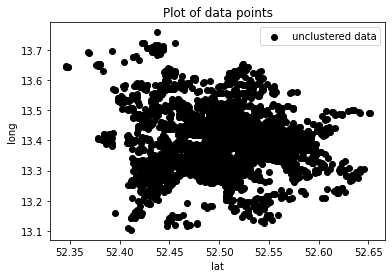

In [ ]:
#melakukan representasi persebaran data yang belum dilakukan cluster
plt.scatter(X[:,0],X[:,1],c='black',label='unclustered data')
#memberi label sumbu x dengan lat
plt.xlabel('lat')
#memberi label sumbu y dengan long
plt.ylabel('long')
plt.legend()
#memberikan judul plot dengan Plot of data points 
plt.title('Plot of data points')
#menampilkan plot
plt.show()

### **Representasi Persebaran Data setelah dilakukan Clustering**

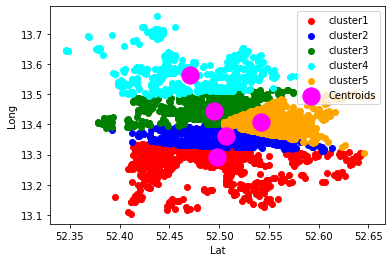

In [ ]:
#menentukan warna setiap cluster
color = ['red','blue','green','cyan','orange']
#memberi nama label cluster sesuai dengan warnanya
labels = ['cluster1','cluster2','cluster3', 'cluster4', 'cluster5']
#melakukan perulangan k sebanyak K kali. Dimana K = Jumlah clustering yaitu 5
for k in range(K):
    #mengeluarkan output warna dari setiap cluster beserta labelnya
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c = color[k], label = labels[k])
#mengeluarkan output letak dan tabel centroid yang ditandai dengan lingkaran warna kuning
plt.scatter(Centroids[0,:],Centroids[1,:],s = 300,c = 'magenta', label = 'Centroids')
#memberikan nama label sumbu x dengan Lat yang berarti Latitude
plt.xlabel('Lat')
#memberikan nama label sumbu x dengan Long yang berarti Longitude
plt.ylabel('Long')
plt.legend()
#Menampilkan plot secara keseluruhan
plt.show()

### **Evaluasi Menggunakan Elbow Methode**
---

Elbow method adalah metoda yang sering dipakai untuk menentukan jumlah cluster yang akan digunakan pada k-means clustering. Tujuannya adalah menghitung WCSS se-minimum dengan jumlah cluster yang kecil agar bisa dilakukan interpretasi data.



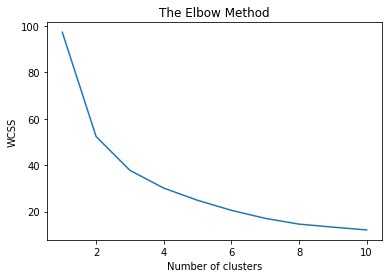

In [ ]:
#menggunakan elbow method untuk menemukan nomor cluster yang optimal menggunakan sklearn libraries
#import library
from sklearn.cluster import KMeans
#membuat array dengan nama wcss
wcss = []
#melakukan perulangan dari 1 sampai 11
for i in range(1, 11):
    #membuat nama variabel = kmeans yang mendeskripsikan jumlah cluster, perulangan k-means, dan random statenya
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 50)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
#menampilkan plot wcss

plt.plot(range(1, 11), wcss)
#memberikan label plot dengan judul The Elbow Method
plt.title('The Elbow Method')
#memberikan label x dengan nama Number of clusters
plt.xlabel('Number of clusters')
#memberikan label y dengan nama WCSS
plt.ylabel('WCSS')
#menampilkan plot
plt.show()

Hasil dari Elbow Method didapatkan bahwa clustering terbaik berjumlah 3 buah cluster, sehingga jumlah cluster yang seharusnya dan efektif berjumlah 3 cluster.

## **Kesimpulan**

Dari hasil clustering yang didapatkan, atribut latitude dan longitude dapat diclustering menjadi 5 buah cluster. Namun, setelah data sudah berhasil dicluster menjadi 5 buah, saya mencari jumlah cluster yang efektif menggunakan Elbow Methode dan didapatkan hasil bahwa jumlah cluster yang efektif adalah sebanyak 3 buah agar dapat dapat dikelompokkan sesuai dengan yang seharusnya.

Evaluasinya adalah, agar jumlah cluster yang didapatkan lebih efektif maka alangkah baiknya mencari jumlah cluster yang efektif terlebih dahulu menggunakan Elbow Method.